In [100]:
from config import TOKEN
import requests
# import json
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

API_URL = 'https://api.github.com/'
REPO_NAME = 'angular'
REPO = 'repos/' + REPO_NAME + '/' + REPO_NAME + '/'

params = {
    'access_token': TOKEN
}

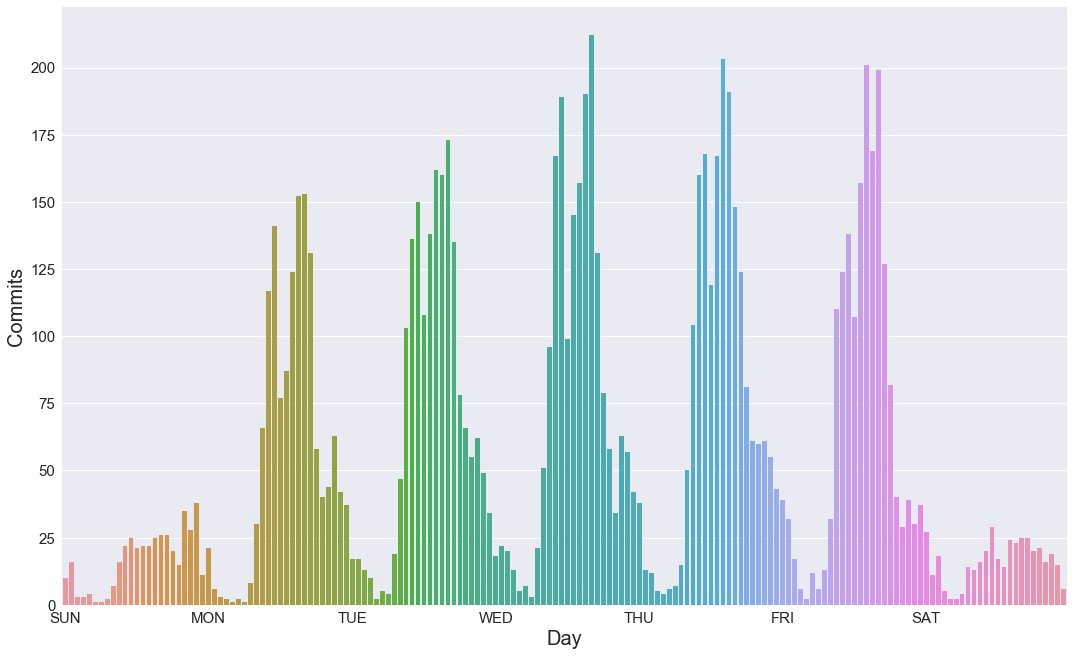

In [101]:
# COMMITS PER DAY
# %matplotlib inline

response = requests.get(
    API_URL + REPO + 'stats/punch_card',
    params=params
).json()

fig, ax = plt.subplots()
# fig.canvas.draw()
# the size of A4 paper
fig.set_size_inches(18, 11)


data = [c for d, h, c in response]
labels = [x for x in range(len(data))]
        
ax = sns.barplot(labels, data)

new_labels = []

days = ['SUN', 'MON', 'TUE', 'WED', 'THU', 'FRI', 'SAT']
cnt = 0

for label, pos in zip(ax.xaxis.get_ticklabels(), range(len(data))):
    label.set_visible(False)
    if pos % 24 == 0:
        label.set_text(days[cnt])
        cnt += 1
        label.set_visible(True)
        
    new_labels.append(label)
        
ax.set_xticklabels(new_labels)
ax.set_xlabel('Day')
ax.set_ylabel('Commits')

for item in (ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(15)
    
for item in ([ax.xaxis.label, ax.yaxis.label]):
    item.set_fontsize(20)
    
fig.savefig(REPO_NAME + '-commits-per-day.png')
print()